In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\KU_0373\Downloads\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# so in x axis we have 

In [4]:
x = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
x['Age'].fillna(x['Age'].mean(), inplace=True)

In [7]:
x['Age'] = x['Age'].astype(int)

In [12]:
x

,Pclass,Sex,Age,Fare
0,3,male,22,7.2500
1,1,female,38,71.2833
2,3,female,26,7.9250
3,1,female,35,53.1000
4,3,male,35,8.0500
...,...,...,...,...
886,2,male,27,13.0000
887,1,female,19,30.0000
888,3,female,29,23.4500
889,1,male,26,30.0000


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
# Normally we cant perform the ml models on label data(string, text data) so we need to conver the numerical data.
# so we need to import labelEncoder
from sklearn.preprocessing import LabelEncoder
sex_n = LabelEncoder()

In [14]:
x['new_sex'] = sex_n.fit_transform(x['Sex'])

In [15]:
x

,Pclass,Sex,Age,Fare,new_sex
0,3,male,22,7.2500,1
1,1,female,38,71.2833,0
2,3,female,26,7.9250,0
3,1,female,35,53.1000,0
4,3,male,35,8.0500,1
...,...,...,...,...,...
886,2,male,27,13.0000,1
887,1,female,19,30.0000,0
888,3,female,29,23.4500,0
889,1,male,26,30.0000,1


In [16]:
x.drop(['Sex'], inplace=True, axis=1)

In [17]:
x

,Pclass,Age,Fare,new_sex
0,3,22,7.2500,1
1,1,38,71.2833,0
2,3,26,7.9250,0
3,1,35,53.1000,0
4,3,35,8.0500,1
...,...,...,...,...
886,2,27,13.0000,1
887,1,19,30.0000,0
888,3,29,23.4500,0
889,1,26,30.0000,1


In [18]:
# we need split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10) 

In [19]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
model.score(x_test, y_test)

0.8100558659217877

In [28]:
model.predict([[1, 38, 71.2833, 0]])

array([1], dtype=int64)

In [29]:
y_test_predict = model.predict(x_test)

In [30]:
# check the matrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[97, 20],
       [14, 48]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.8100558659217877

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=10)

array([0.76388889, 0.79166667, 0.78873239, 0.8028169 , 0.73239437,
       0.73239437, 0.76056338, 0.91549296, 0.73239437, 0.78873239])

In [33]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, y_predict))
# there were used below one.
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       117
           1       0.71      0.77      0.74        62

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.82      0.81      0.81       179



In [34]:
model.classes_

array([0, 1], dtype=int64)

In [36]:
model.score(x_test, y_test)

0.8100558659217877

In [37]:
model.score(x_test, y_test)
# in the score we need to use x and y test

0.8100558659217877

In [38]:
cm

array([[97, 20],
       [14, 48]], dtype=int64)

<Axes: >

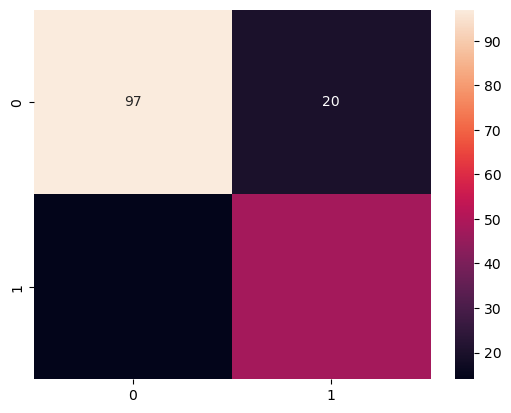

In [40]:
sns.heatmap(cm, annot=True)